<p align="center">
  <span style="font-size:22px"><b>ISEL</b></span><br>
  <span style="font-size:22px"><b>Departamento de Engenharia Informática</b></span><br>
  <span style="font-size:22px"><b>Licenciatura em Engenharia Informática e Multimédia</b></span><br>
  <span style="font-size:22px"><b>Processamento de Sinais Multimédia</b></span><br><br>
  <span style="font-size:18px"><b>1º Trabalho Prático</b></span><br>
  <span style="font-size:16px">3º Semestre 2025/2026</span><br><br>
  <span style="font-size:16px">Docente: Prof. Tiago Gonçalves</span><br><br>
  <span style="font-size:16px">Trabalho realizado por:</span><br>
  <span style="font-size:16px">David Santos nº51417</span><br>
  <span style="font-size:16px">Bernardo Aguiar nº52483</span><br>
  <span style="font-size:16px">Diogo Costa nº52453</span><br>
</p>

##### a) Implemente os Comb-filters na sua estrutura Feadback Comb-Filter FBCF(α, Dc) = (z^(−Dc))/(1−αz−Dc), onde α está associado ao ganho e Dc ao atraso introduzido (em nº de amostras).

i) Determine e mostre a resposta em frequência (amplitude e fase). Apresente o Diagrama-Polos-Zeros. Nota: Resolva para conjunto de ganhos separadamente.


c:\Users\pitad\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_filter_design.py:1125: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


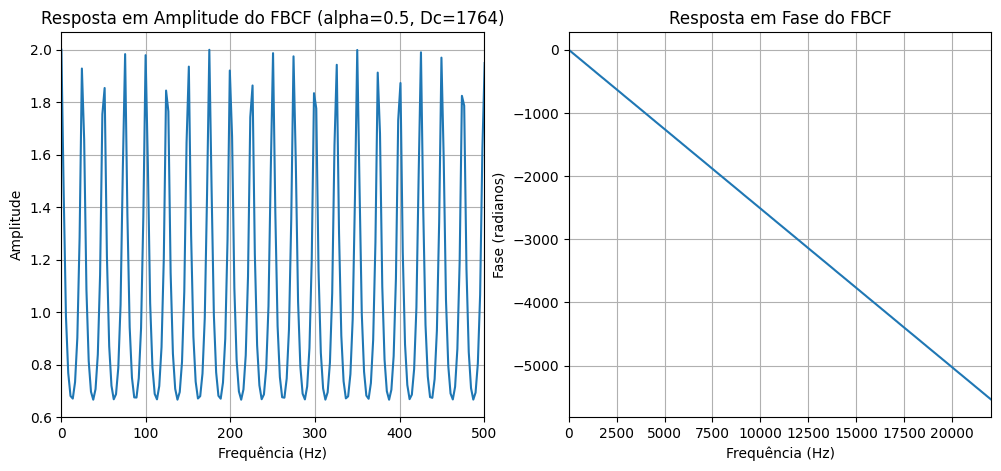

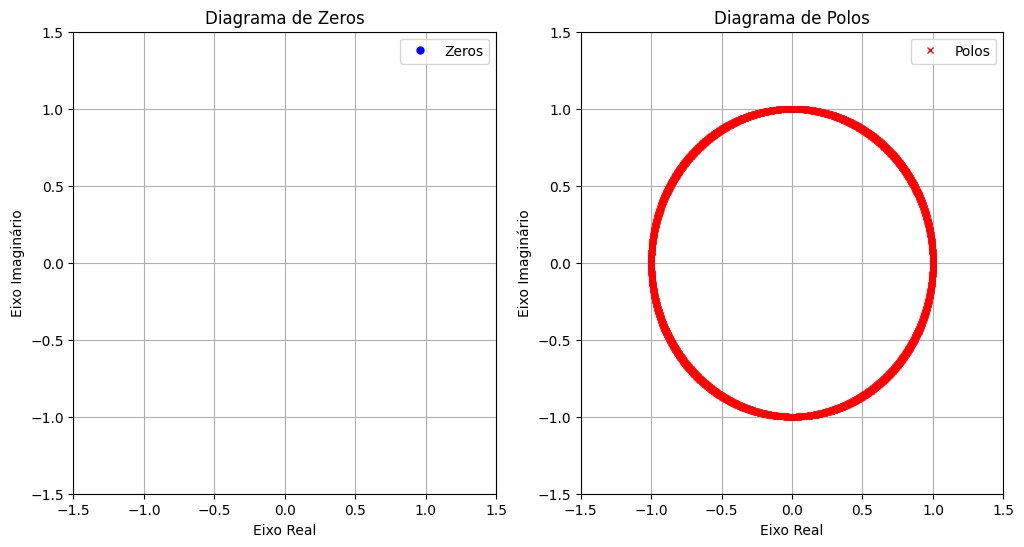

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss

Fs = 44100

def FBCF(alpha, atraso):
    Dc = int(atraso * (Fs / 1000))

    bks = np.zeros(Dc + 1)
    bks[Dc] = 1.0

    aks = np.zeros(Dc + 1)
    aks[0] = 1.0
    aks[Dc] = -alpha

    w, H = ss.freqz(bks, aks, worN=8192)
    f = w * Fs / (2 * np.pi)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(f, np.abs(H))
    plt.title(f'Resposta em Amplitude do FBCF (alpha={alpha}, Dc={Dc})')
    plt.grid(True)
    plt.xlim(0, 500)
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Amplitude')

    plt.subplot(1, 2, 2)
    plt.plot(f, np.unwrap(np.angle(H)))
    plt.title('Resposta em Fase do FBCF')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Fase (radianos)')
    plt.grid(True)
    plt.xlim(0, Fs/2)
    
    zeros, polos, k = ss.tf2zpk(bks, aks)
    
    # O sistema não possui zeros e possui um número de polos igual ao número de amostras (Dc)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(np.real(zeros), np.imag(zeros), 'o', markersize=5, color='blue', label='Zeros')    
    plt.title('Diagrama de Zeros')
    plt.xlabel('Eixo Real')
    plt.ylabel('Eixo Imaginário')
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.grid(True)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(np.real(polos), np.imag(polos), 'x', markersize=5, color='red', label='Polos')
    plt.title('Diagrama de Polos')
    plt.xlabel('Eixo Real')
    plt.ylabel('Eixo Imaginário')
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.grid(True)
    plt.legend()

    plt.show()

    return w, H

#FBCF(0.3, 30)
FBCF(0.5, 40)
#FBCF(0.9, 45)
#FBCF(0.4, 35)

ii) Determine experimentalmente a resposta impulsional. Ilustre graficamente, guarde num ficheiro wave e escute o resultado.

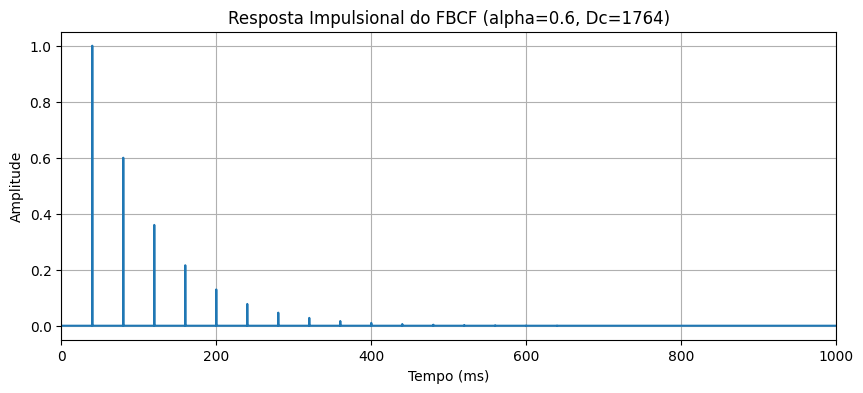

In [52]:
from scipy.io import wavfile 

atraso = 40  
alpha = 0.6
Dc = int(atraso * (Fs / 1000))
DURACAO_SEG = 1     

bks = np.zeros(Dc + 1)
bks[Dc] = 1.0

aks = np.zeros(Dc + 1)
aks[0] = 1.0
aks[Dc] = -alpha

NUM_AMOSTRAS = int(Fs * DURACAO_SEG)

impulso = np.zeros(NUM_AMOSTRAS)
impulso[0] = 1.0

h_n = ss.lfilter(bks, aks, impulso)

t = np.arange(0, DURACAO_SEG, 1 / Fs)

plt.figure(figsize=(10, 4))
plt.plot(t * 1000, h_n) 
plt.title(f'Resposta Impulsional do FBCF (alpha={alpha}, Dc={Dc})')
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(0, 1000) 
plt.show()

wavfile.write('fbcf_resposta_impulsional.wav', Fs, h_n.astype(np.float32))

iii) Aplique este filtro a sinais de teste (que considere adequados) e sinais audio para testar a sua funcionalidade.

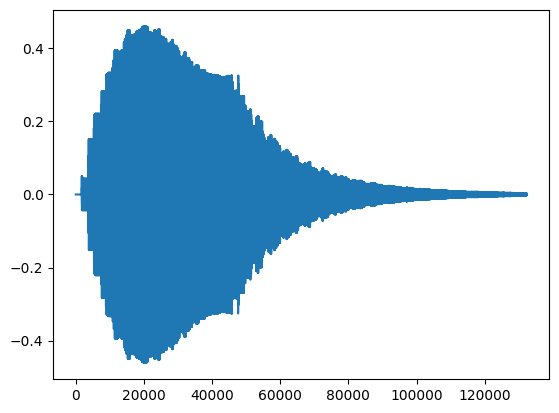

In [ ]:
bks = np.zeros(Dc + 1)
bks[Dc] = 1.0

aks = np.zeros(Dc + 1)
aks[0] = 1.0
aks[Dc] = -alpha

FREQUENCIA_HZ = 440
AMPLITUDE = 0.2

NUM_AMOSTRAS = int(Fs * DURACAO_SEG)
tempo = np.arange(0, DURACAO_SEG, 1/Fs)

sinal_teste = AMPLITUDE * np.cos(2 * np.pi * FREQUENCIA_HZ * tempo) 

sinal_processado = ss.lfilter(bks, aks, sinal_teste)

Dc_list = [1764, 1800, 1850, 1900]
alpha_list = [0.9, 0.85, 0.88, 0.92]

pad_length = Fs * 2  # at least the largest delay
sinal_teste_padded = np.concatenate([sinal_teste, np.zeros(pad_length)])

# Initialize output
sinal_processado_total = np.zeros_like(sinal_teste_padded)

for Dc, alpha in zip(Dc_list, alpha_list):
    bks = np.zeros(Dc + 1)
    bks[Dc] = 1.0

    aks = np.zeros(Dc + 1)
    aks[0] = 1.0
    aks[Dc] = -alpha

    sinal_processado_total += ss.lfilter(bks, aks, sinal_teste_padded)

sinal_processado_total = sinal_processado_total / 4

wavfile.write('fbcf_audio_processado.wav', Fs, sinal_processado_total.astype(np.float32))

#TESTE MAS ESTÁ A FUNCIONAR FIXE

plt.plot(sinal_processado_total)